In [1]:
import sys
sys.path.append('../../')

import numpy as np

from src.mechanism.llg_auction import LLGAuction
from src.game import Game
from src.strategy import Strategy

from src.learner.frank_wolfe import FrankWolfe
from src.learner.soma import SOMA
from src.learner.soda import SODA

In [2]:
# parameter mechanism
bidder = ['L', 'L', 'G']
o_space = {'L':[0,1], 'G':[0,2]}
a_space = {'L':[0,1], 'G':[0,2]}

param_prior = {
    'distribution':'uniform',
    'corr': 0.7
    }

param_util ={
    'payment_rule': 'NB',
    'tie_breaking': 'local',
            }

# parameter approximation game
n = 64
m = 64

# create mechanism
mechanism = LLGAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)


**Learner**
Specify Learning Algorithm

In [3]:
# parameter learner
max_iter = int(1e3)
tol = 1e-4
stop_criterion = 'dist_euclidean'
regularizer = 'entropic'
steprule_bool = True
eta = 10
beta = 1/20

learner = SODA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = SOMA(max_iter, tol, stop_criterion, regularizer, steprule_bool, eta, beta)
#learner = FrankWolfe(max_iter, tol, stop_criterion)

Run Learning Algorithm

In [4]:
#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')
    
# run soda
learner.run(mechanism, game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=False)

 56%|███████████▏        | 558/1.00k [00:58<00:46, 9.61it/s] 

Convergence after 558 iterations
Value of stopping criterion (dist_euclidean) 0.0001


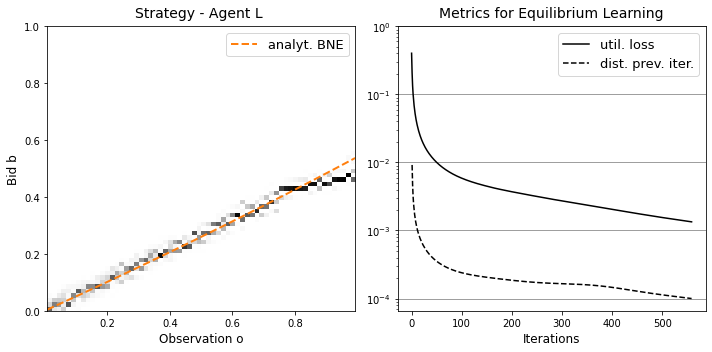

In [5]:
agent = 'L'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(metrics=True, beta=bne)

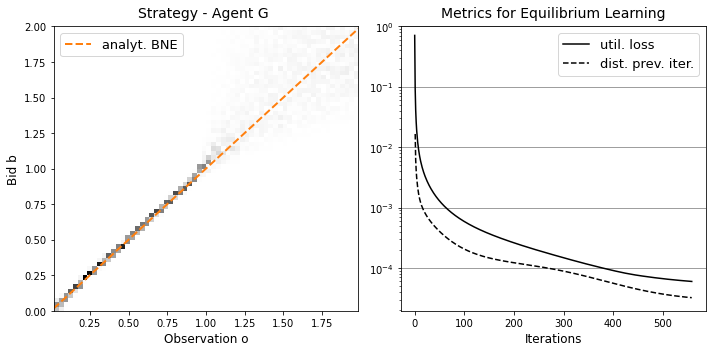

In [6]:
agent = 'G'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(metrics=True, beta=bne)

In [7]:
isinstance(beta, function)

NameError: name 'function' is not defined

In [ ]:
bne = lambda x: 0.5*x
callable(bne)

True